**SEGMENTATION USING GMM**

/home/ari-18308/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:400: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)


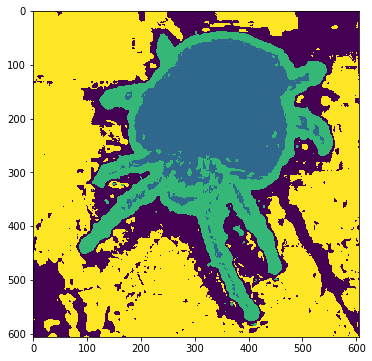

In [94]:
from sklearn.mixture import GaussianMixture
import numpy as np
import cv2
np.float = np.float_

# Load the image
image = cv2.imread('img4.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels (rows x columns, 3 channels)
pixels = image.reshape((-1, 3))

# Create and fit a GMM with two components
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(pixels)

# Segment the image
segmentation = gmm.predict(pixels)
segmentation = segmentation.reshape(image.shape[:2])

# Visualize the segmented image with component labels
plt.figure(figsize=(8, 6))
plt.imshow(segmentation, cmap='viridis')


plt.show()


**SEGMENTED PART**

/home/ari-18308/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:400: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)


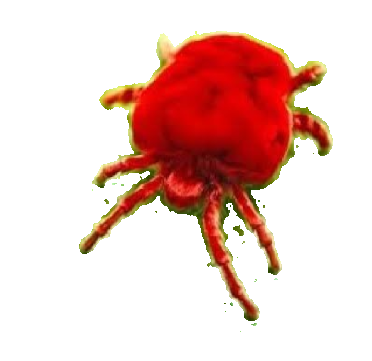

In [104]:
from sklearn.mixture import GaussianMixture
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Load the image
image = cv2.imread('img4.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image into a 2D array of pixels (rows x columns, 3 channels)
pixels = image.reshape((-1, 3))

# Create and fit a GMM with two components
n_components = 4
gmm = GaussianMixture(n_components=n_components, random_state=0)
gmm.fit(pixels)

# Segment the image
segmentation = gmm.predict(pixels)
segmentation = segmentation.reshape(image.shape[:2])

# Create a mask for the 1st and 2nd components (0-based index)
component_mask = np.logical_or(segmentation == 1, segmentation == 2)

# Create an image with a transparent background
transparent_image = Image.new('RGBA', image.shape[:2][::-1], (0, 0, 0, 0))

# Create an ImageDraw object to draw on the transparent image
draw = ImageDraw.Draw(transparent_image)

# Fill the transparent image with the pixels from the selected components
for x in range(transparent_image.width):
    for y in range(transparent_image.height):
        if component_mask[y, x]:
            draw.point((x, y), fill=(image[y, x, 0], image[y, x, 1], image[y, x, 2], 255))

# Display the transparent image
plt.figure(figsize=(8, 6))
plt.imshow(transparent_image)
plt.axis('off')  # Hide axis
plt.show()
